In [1]:
import ast
import os
import urllib.request as ulib

# a library that will turn a weird string that we'll scrape from Google into one that we can read
from bs4 import BeautifulSoup as Soup

In [2]:
from selenium import webdriver

In [3]:
chromePath = r'/Users/rowanarts/Downloads/chromedriver'

In [21]:
URL = "https://www.google.nl/search?biw=1200&bih=656&tbs=ic%3Acolor&tbm=isch&sa=1&ei=PH5-XM_4OLiDk74PgZyi6AE&q=mosh+pit+death+wall&oq=mosh+pit+death+wall&gs_l=img.3..0i8i30l2.9595.14771..15342...8.0..0.59.942.21......0....1..gws-wiz-img.......0i67j0j0i19j0i10i19j0i5i10i30j0i30j0i8i30i19j0i30i19j0i24.h8y1BvedI6k"

In [22]:
driver = webdriver.Chrome(chromePath)

def getURLs(URL):
    driver.get(URL)
    a = input()
    page = driver.page_source
    print(page)
    soup = Soup(page, 'lxml')
    
    desiredURLs = soup.findAll('div', {'class':'rg_meta notranslate'})
    
    ourURLs = []
    
    for url in desiredURLs:
        theURL = url.text
        theURL = ast.literal_eval(theURL)['ou'] #converting to a dictionary
        
        ourURLs.append(theURL)
        
    return ourURLs

In [23]:
def save_images(URLs, directory):
    if not os.path.isdir(directory):
        os.mkdir(directory)
        
    for i, url in enumerate(URLs):
        savePath = os.path.join(directory, '{:06}.jpg'.format(i))
        
        try:
            ulib.urlretrieve(url, savePath)
        except:
            print("I failed with, ", url)

hello
<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="nl"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image" /><meta content="origin" name="referrer" /><title>mosh pit death wall - Google zoeken</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.1YQiBIu1zGM.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8jmooDqnwUNQ5CPVlex635ObQRZg/cb=gapi.loaded_0" nonce="iqRcAm9HvzxZlOZ/ktlAXw==" async=""></script><script nonce="iqRcAm9HvzxZlOZ/ktlAXw==">(function(){window.google={kEI:'ln5-XOjfO-HQmwXk7K2IDg',kEXPI:'0,1353747,57,1958,1016,1406,697,528,730,752,1047,30,1228,805,1077,81,25,490,351,79,45,2334182,329484,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,278,1192,14056,867,7049,2445,2646,23,770,845,3666,1027,3536,4480,2197,364,3319,4277,1228,1241,1201,260,1027,232,11
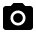
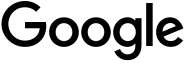
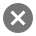
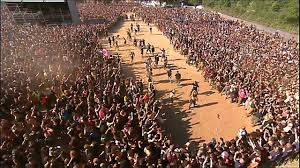
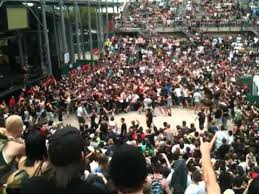
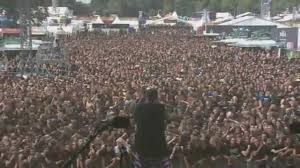
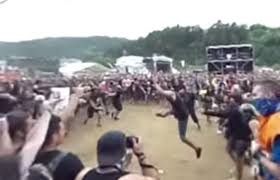
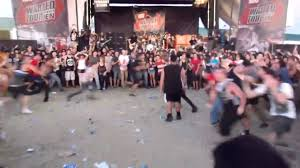
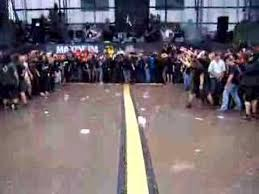
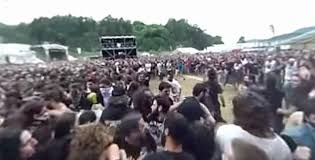
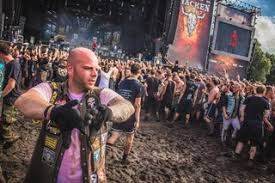
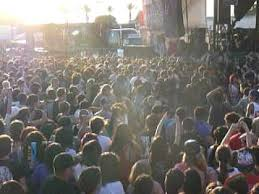
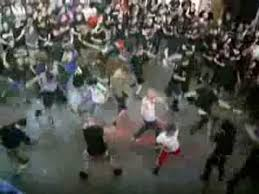
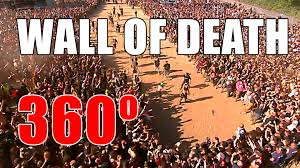
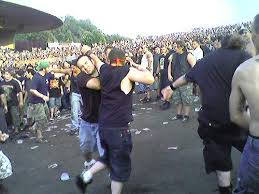
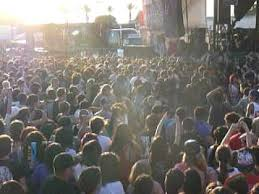
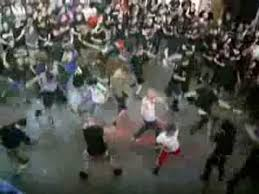
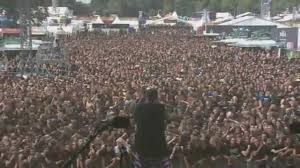

I failed with,  https://media.altpress.com/uploads/2018/07/360_Wall_Of_Death_-_News_620-400.jpg
I failed with,  https://cdn1-www.musicfeeds.com.au/assets/uploads/f2e670d7ae032305e4c2223208e97642.jpg
I failed with,  https://societyofrock.com/wp-content/uploads/2015/07/exodus-wall-of-death--735x413.jpg
I failed with,  https://i2-prod.mirror.co.uk/incoming/article6391328.ece/ALTERNATES/s1200/When-youre-so-in-the-moment-having-a-dance-you-dont-realise-the-wall-of-death-main.jpg
I failed with,  https://www.thecirclepit.com/wp-content/uploads/2018/01/BabyWallOfDeath.jpg
I failed with,  http://dailycrawfishnews.com/wp-content/uploads/2016/04/fil2016mosh.jpg
I failed with,  https://cdn3-www.musicfeeds.com.au/assets/uploads/898bcacc93897761b29c00442d99e4e2-640x360.jpg
I failed with,  https://tonedeaf.thebrag.com/wp-content/uploads/2015/09/wall_of_death_img-600x277.jpg
I failed with,  https://coubsecure-s.akamaihd.net/get/b60/p/coub/simple/cw_timeline_pic/4e115102c4e/418f08d98b1c8855aa4c7/med_14

In [24]:
URLs = getURLs(URL)

for url in URLs:
    print(url)
    
save_images(URLs, './Death Wall Moshpit Pictures')